# IMPORTING LIBRARIES

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# LOADING DATASET

In [137]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
0,dmp923122274,0,0,2,0,0,3,6,0,0,...,0,0,0,4,0,0,1,0,1,0
1,dmp458034174,0,3,0,0,0,0,1,0,0,...,0,0,0,12,0,2,2,12,0,0
2,dmp364043571,0,2,0,0,0,0,0,0,2,...,0,0,0,11,0,0,0,0,0,0
3,dmp461339655,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,22,0,0
4,dmp549691332,0,0,0,0,0,5,7,0,0,...,0,0,1,0,0,0,1,0,0,0


In [138]:
mask=np.zeros_like(df.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True

PLEASE ZOOM THE BELOW HEATMAP TO GET A CLEARER PICTURE AS THE NUMBER OF FEATURES IS HUGE

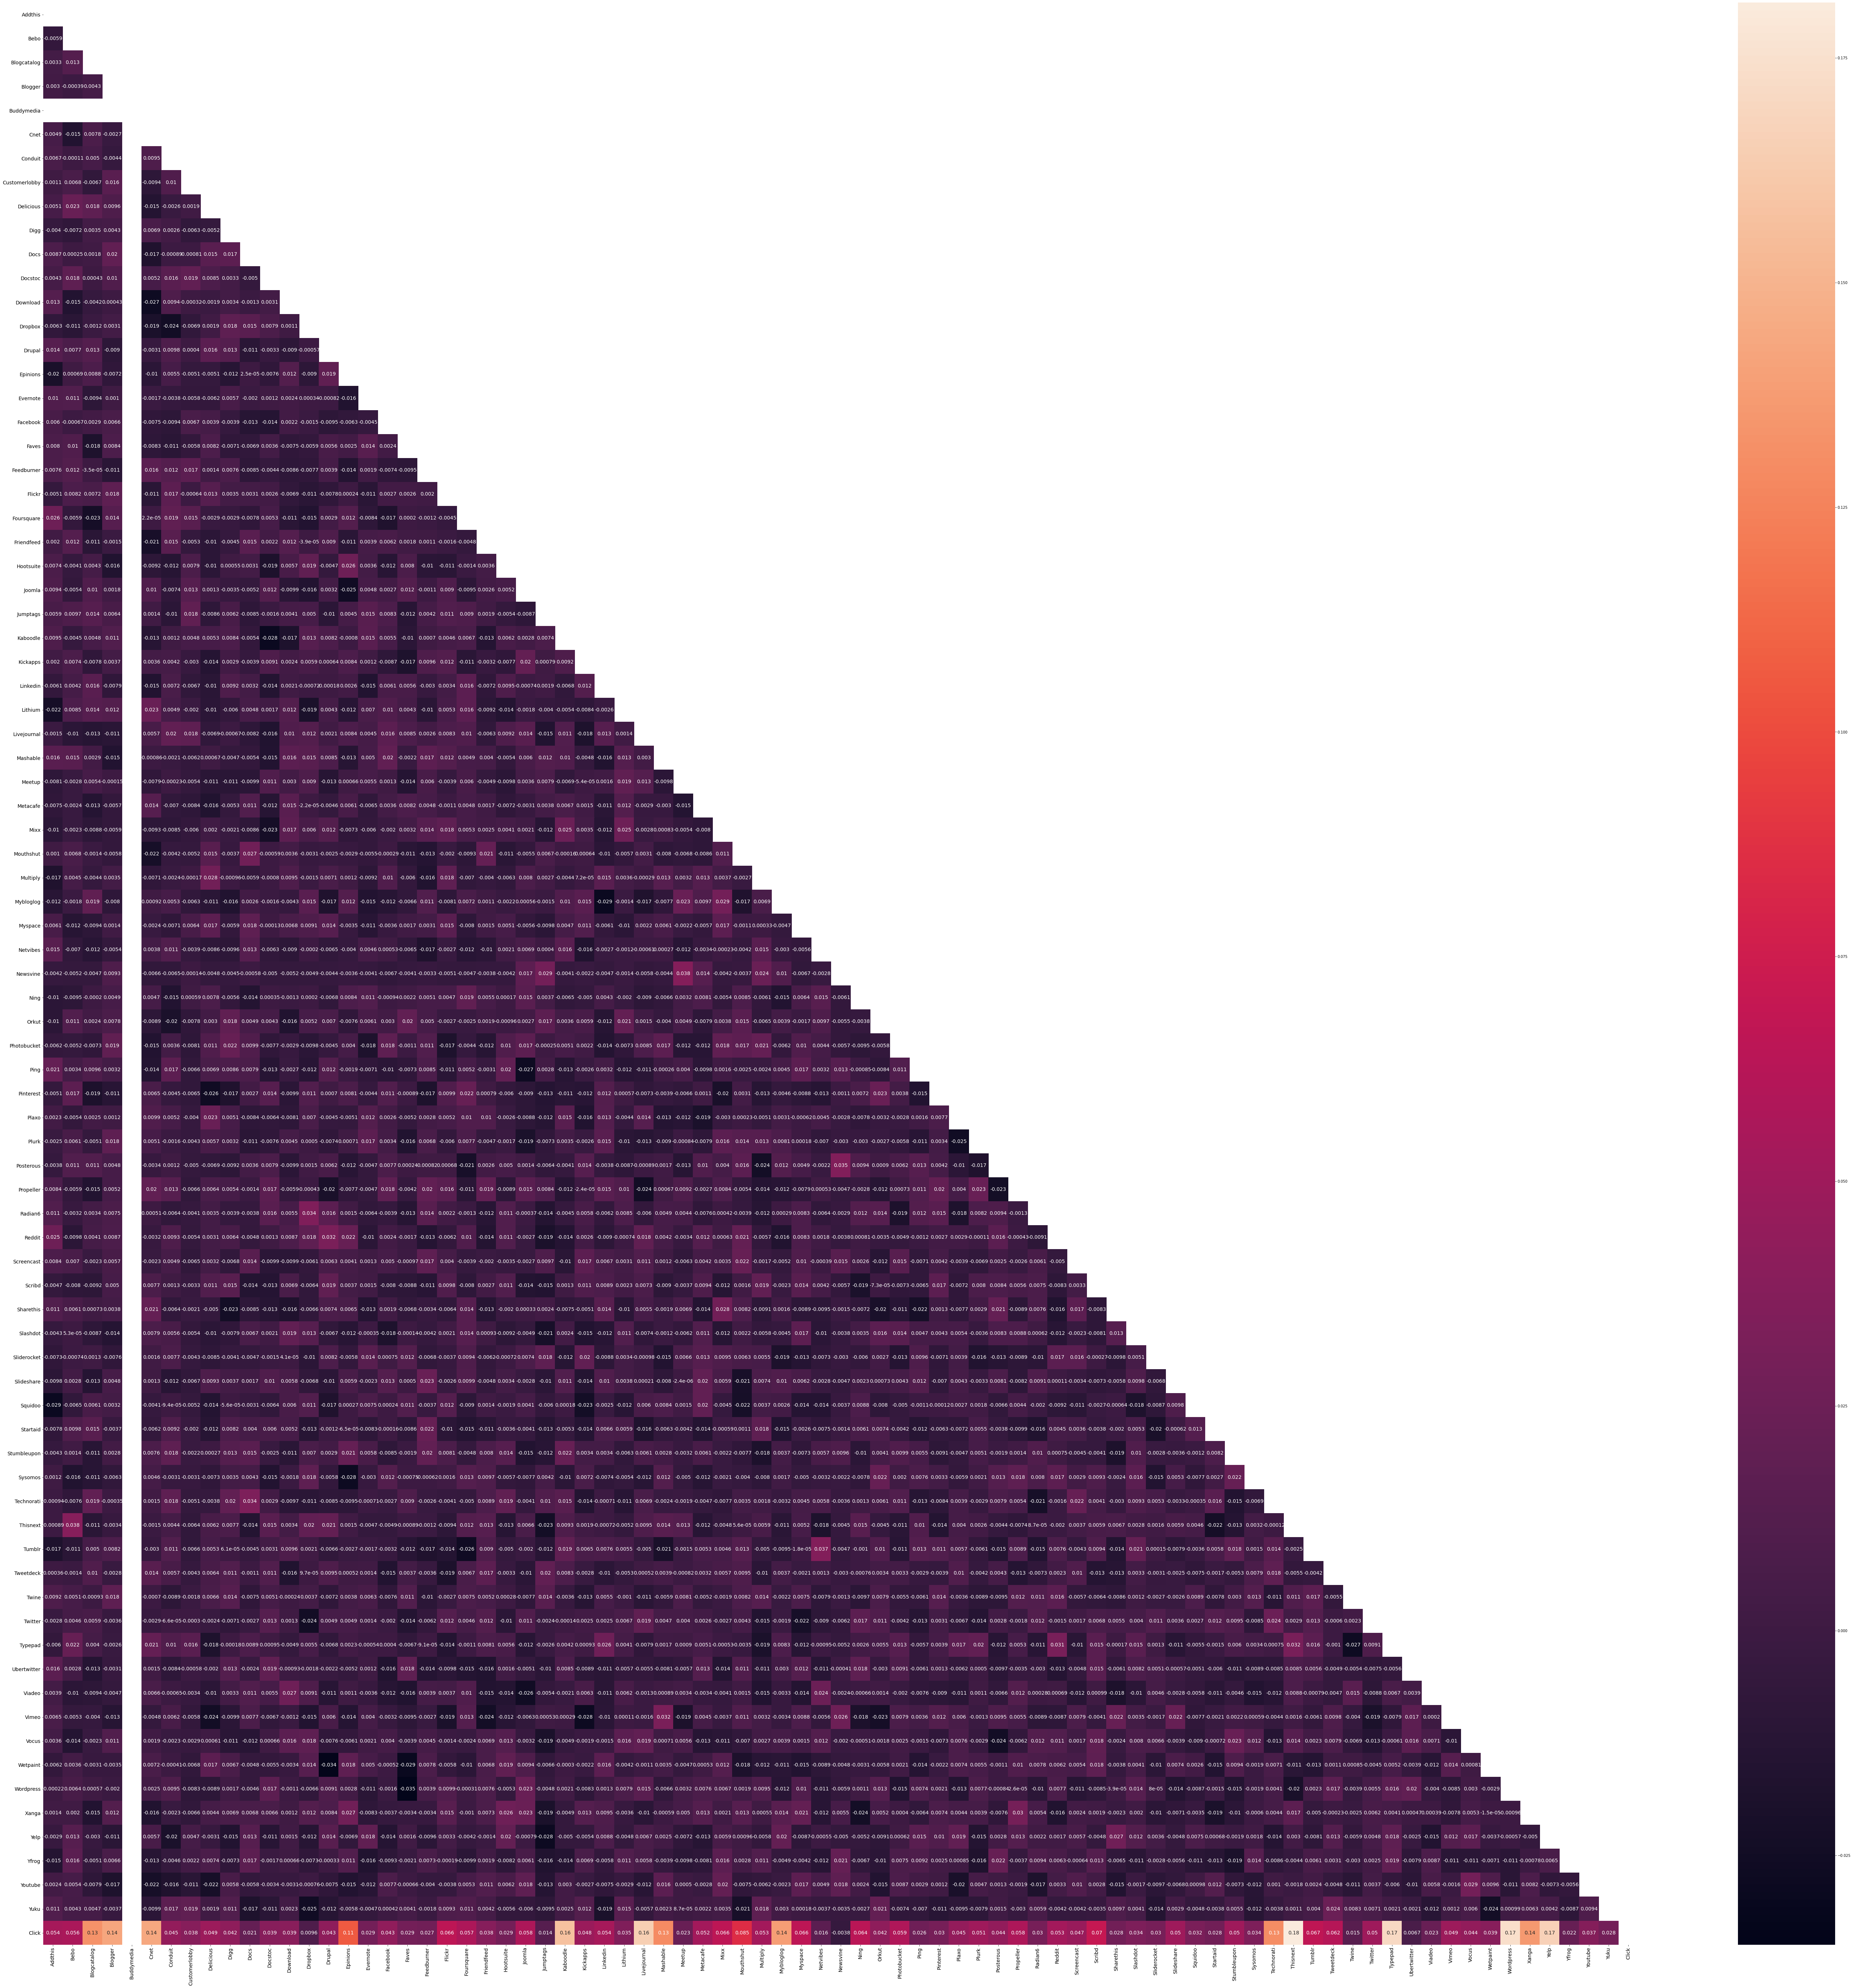

In [139]:
plt.figure(figsize=(100,100))
sns.heatmap(df.corr(),mask=mask, annot=True, annot_kws={'size':14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# CHECKING AND REMOVING ABRUPT VALUES

In [140]:
df.Diigo.value_counts()

0                         8842
Error: value not found     642
1                          332
2                          183
3                            1
Name: Diigo, dtype: int64

In [141]:
df=df[df.Diigo!='Error: value not found']

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9358 entries, 0 to 9999
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     9358 non-null   object
 1   Addthis        9358 non-null   int64 
 2   Bebo           9358 non-null   int64 
 3   Blogcatalog    9358 non-null   int64 
 4   Blogger        9358 non-null   int64 
 5   Buddymedia     9358 non-null   int64 
 6   Cnet           9358 non-null   int64 
 7   Conduit        9358 non-null   int64 
 8   Customerlobby  9358 non-null   int64 
 9   Delicious      9358 non-null   int64 
 10  Digg           9358 non-null   int64 
 11  Diigo          9358 non-null   object
 12  Docs           9358 non-null   int64 
 13  Docstoc        9358 non-null   int64 
 14  Download       9358 non-null   int64 
 15  Dropbox        9358 non-null   int64 
 16  Drupal         9358 non-null   int64 
 17  Epinions       9358 non-null   int64 
 18  Evernote       9358 non-null

# CHECKING STATS ABOUT THE CLICKS FEATURE

In [143]:
df["Click"].value_counts()

0    8205
1    1153
Name: Click, dtype: int64

In [144]:
df.dtypes.all()

dtype('int64')

# CREATING DATASETS FOR TRAINING

In [145]:
X=df.drop(['Unnamed: 0','Click'],axis=1)
Y=df.Click

# SPLITTING THE DATASET INTO TRAINING AND TESTING

In [146]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

# SUPPORT VECTOR MACHINE

In [147]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [148]:
model.score(x_test,y_test)

0.8659188034188035

In [149]:
print(cross_val_score(model,X,Y,cv=3))

[0.87660256 0.87688362 0.90445656]


# RANDOM FOREST

In [150]:
model2=RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [151]:
model2.score(x_test,y_test)

0.8664529914529915

In [152]:
print(cross_val_score(model2,X,Y,cv=3))

[0.87788462 0.87880731 0.87720423]


# DECISION TREE CLASSIFIER

In [153]:
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [154]:
model3.score(x_test,y_test)

0.8370726495726496

In [155]:
print(cross_val_score(model3,X,Y,cv=3))

[0.83974359 0.83712728 0.84866945]


# PERFORMANCE EVALUATORS

### CONFUSION MATRIX ON HEATMAP

In [156]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14,text=''):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.title(text)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

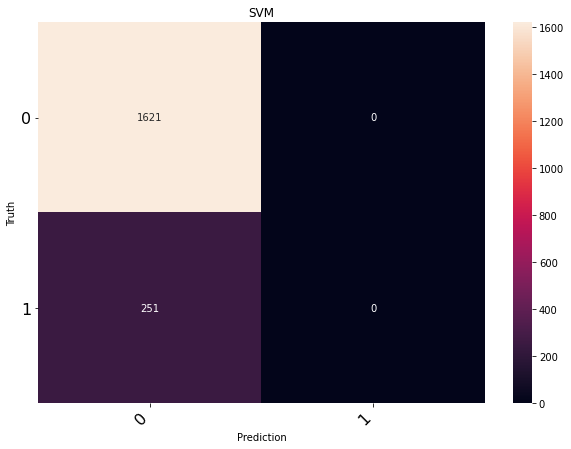

In [157]:
truth=y_test
prediction=model.predict(x_test)
cm=confusion_matrix(truth,prediction)
print_confusion_matrix(cm,[0,1],text='SVM',fontsize=16)

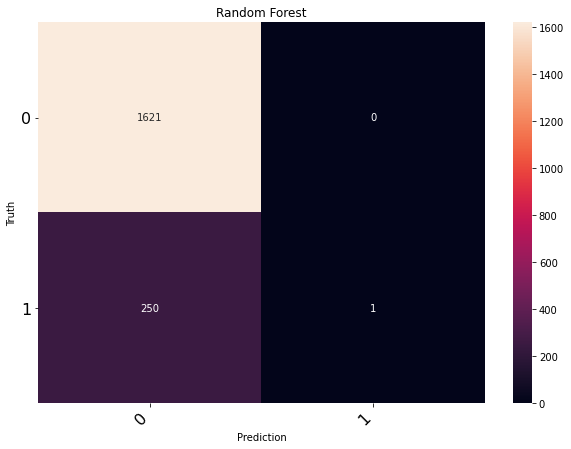

In [158]:
truth=y_test
prediction=model2.predict(x_test)
cm=confusion_matrix(truth,prediction)
print_confusion_matrix(cm,[0,1],text='Random Forest',fontsize=16)

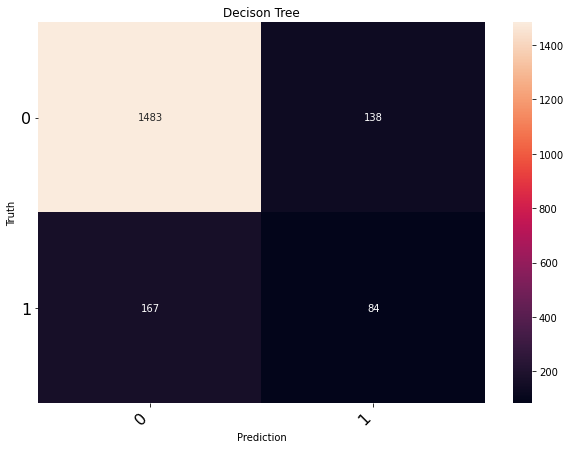

In [159]:
truth=y_test
prediction=model3.predict(x_test)
cm=confusion_matrix(truth,prediction)
print_confusion_matrix(cm,[0,1],text='Decison Tree',fontsize=16)

### PRECISION, RECALL, F1-SCORE & SUPPORT 

##### SVM

In [160]:
truth=y_test
prediction=model.predict(x_test)
print(classification_report(truth, prediction))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1621
           1       0.00      0.00      0.00       251

    accuracy                           0.87      1872
   macro avg       0.43      0.50      0.46      1872
weighted avg       0.75      0.87      0.80      1872



##### RANDOM FOREST

In [161]:
truth=y_test
prediction=model2.predict(x_test)
print(classification_report(truth, prediction))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1621
           1       1.00      0.00      0.01       251

    accuracy                           0.87      1872
   macro avg       0.93      0.50      0.47      1872
weighted avg       0.88      0.87      0.80      1872



##### DECISION TREE

In [162]:
truth=y_test
prediction=model3.predict(x_test)
print(classification_report(truth, prediction))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1621
           1       0.38      0.33      0.36       251

    accuracy                           0.84      1872
   macro avg       0.64      0.62      0.63      1872
weighted avg       0.83      0.84      0.83      1872



# INFLUENTIAL FACTORS

In [163]:
x_train.columns[3]

'Blogger'

##### DECISION TREE

Feature: 0, Score: 0.00934
Feature: 1, Score: 0.01476
Feature: 2, Score: 0.02263
Feature: 3, Score: 0.04051
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.04434
Feature: 6, Score: 0.01235
Feature: 7, Score: 0.00116
Feature: 8, Score: 0.01314
Feature: 9, Score: 0.00666
Feature: 10, Score: 0.00488
Feature: 11, Score: 0.00121
Feature: 12, Score: 0.01521
Feature: 13, Score: 0.00651
Feature: 14, Score: 0.00546
Feature: 15, Score: 0.00864
Feature: 16, Score: 0.01268
Feature: 17, Score: 0.00229
Feature: 18, Score: 0.01619
Feature: 19, Score: 0.00469
Feature: 20, Score: 0.00302
Feature: 21, Score: 0.01199
Feature: 22, Score: 0.00993
Feature: 23, Score: 0.00822
Feature: 24, Score: 0.00832
Feature: 25, Score: 0.01616
Feature: 26, Score: 0.00494
Feature: 27, Score: 0.02381
Feature: 28, Score: 0.00230
Feature: 29, Score: 0.01174
Feature: 30, Score: 0.00210
Feature: 31, Score: 0.04725
Feature: 32, Score: 0.01555
Feature: 33, Score: 0.00507
Feature: 34, Score: 0.01240
Feature: 35, Score: 0.01040
Fe

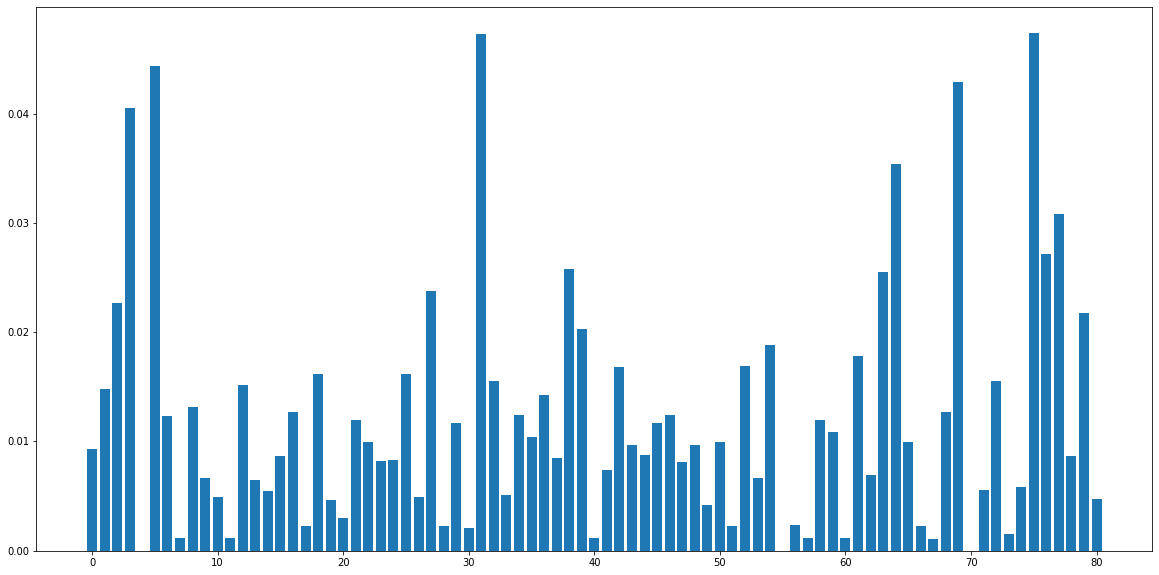

In [164]:
importance = model3.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(20,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

According to the above bar chart, we can see that the top 5 features important for the model are in the order:
<div>1)WordPress</div>
<div>2)Livejournal</div>
<div>3)Yelp</div>
<div>4)Cnet</div>
<div>5)Blogger</div>





##### RANDOM FOREST

Feature: 0, Score: 0.01330
Feature: 1, Score: 0.01450
Feature: 2, Score: 0.02340
Feature: 3, Score: 0.03253
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.03164
Feature: 6, Score: 0.01674
Feature: 7, Score: 0.00055
Feature: 8, Score: 0.01088
Feature: 9, Score: 0.01132
Feature: 10, Score: 0.00313
Feature: 11, Score: 0.00140
Feature: 12, Score: 0.01036
Feature: 13, Score: 0.01252
Feature: 14, Score: 0.00937
Feature: 15, Score: 0.00999
Feature: 16, Score: 0.01477
Feature: 17, Score: 0.00623
Feature: 18, Score: 0.01827
Feature: 19, Score: 0.00651
Feature: 20, Score: 0.00674
Feature: 21, Score: 0.01555
Feature: 22, Score: 0.01245
Feature: 23, Score: 0.00829
Feature: 24, Score: 0.01011
Feature: 25, Score: 0.01370
Feature: 26, Score: 0.00414
Feature: 27, Score: 0.02436
Feature: 28, Score: 0.00434
Feature: 29, Score: 0.01245
Feature: 30, Score: 0.00256
Feature: 31, Score: 0.03556
Feature: 32, Score: 0.01780
Feature: 33, Score: 0.00810
Feature: 34, Score: 0.01492
Feature: 35, Score: 0.01153
Fe

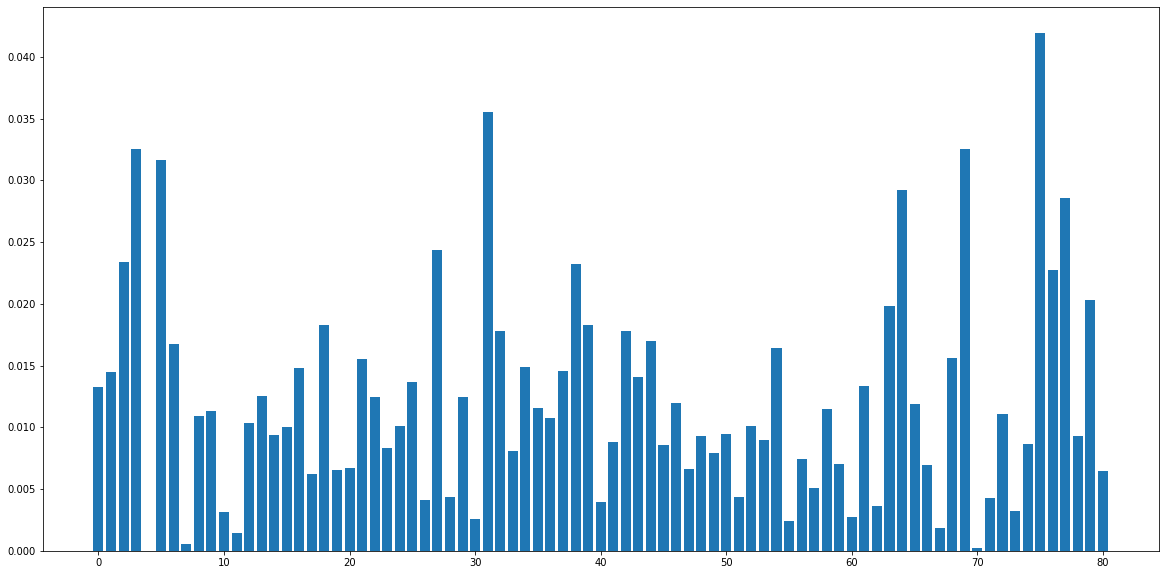

In [165]:
importance = model2.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(20,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

According to the above bar chart, we can see that the top 5 features important for the model are in the order:
<div>1)WordPress</div>
<div>2)Livejournal</div>
<div>3)Yelp</div>
<div>4)Cnet</div>
<div>5)Blogger</div>





##### SO FROM ANALYSING BOTH THE MODELS, RANDOM FOREST AND DECISION TREE WE GET THE SAME LIST OF FACTORS WHICH ARE MOST INFLUENTIAL

## So from my personal point of view according to the analysis by above graphs, the recommended marketing channels would be <b>WordPress</b> and <b>LiveJournal</b>

### To minimize the marketing cost of the company, I would recommend to go with either Cnet or Blogger as they are good features in terms of clicks but not very high nor very low. It would reduce the expenditure a little but wouldn't cause a hurdel in earning good revenue